# 2021-02-09

# 베스트 앨범
## hash

In [ ]:
# 많이 재생된 장르
# 장르 내, 많이 플레이된 곡 순
# 장르 내 재생 횟수가 동일할 시, 고유번호가 낮은 순
# 장르에서 2개만(1개면 1개)
# hash : 장르_횟수
# 
def solution(genres, plays):
    graph={}
    for i,j in zip(genres,plays):
        if graph.get(i):
            graph[i]+=j
        else:
            graph[i]=j
    genres_sorted=sorted(list(graph.keys()),key=lambda i : graph[i], reverse=True)
    graph2={}
    play2=[(i,j) for i,j in enumerate(plays)]
    for i,j in zip(genres,play2):
        if graph2.get(i):
            graph2[i].append(j)
            graph2[i]=sorted(graph2[i], key = lambda i : i[1],reverse=True)
        else:
            graph2[i]=[j]
    result=[]
    for gen in genres_sorted:
        if len(graph2[gen])<2:
            result.append(graph2[gen][0][0])
        else:
            for j in graph2[gen][:2]:
                result.append(j[0])
    
    return result

# 이분 그래프
## graph, if문제

## 내가 처음에 한 식대로 하면, 결국 O(V**2)

In [176]:
def solution(graph):
    if is_binary(graph):
        print('YES')
    else:
        print('NO')
def is_binary(graph): # 2보다 큰 경우는 제거해둠
    for i,j in graph.items():
        if len(j)==2:
            x,y = j
            if y in graph[x]:
                return False
    return True
K = int(input())
for i in range(K):
    V,E = map(int,input().split()) 
    graph = {}#{_+1:[] for _ in range(V)}
    check = False
    for j in range(E):
        a, b = map(int,input().split())
        for x,y in [(a,b),(b,a)]:
            if graph.get(x):
                if len(graph.get(x)):
                    check = False
                graph[x].append(y)
            else:
                graph[x]=[y]
        
        
    if check:
        print('NO')
    else:
        if bfs(graph,V):
            print('YES')
        else:
            print('NO')
    

2
3 2
1 3
2 3
YES
4


ValueError: not enough values to unpack (expected 2, got 1)

In [172]:
graph = {1:[2],2:[1,3],3:[2,4],4:[3],5:[3]}

In [174]:
def bfs(graph,V):
    visited=[]
    next_visit=[list(graph.keys())[0]]
    while next_visit:
        next = next_visit.pop(0)
        if next not in visited:
            visited.append(next)
            if len(graph.get(next))>2:
                return False
            else:
                for j in graph[next]:
                    if j in next_visit:
                        return False
                    else:
                        next_visit.append(j)
    if len(visited)==V:
        return True
    else:
        return False

In [175]:
bfs(graph,4)

True

### Memo  
시간초과가 떴었음


# N과 M(2)  
## dfs 조합

In [ ]:
N,M = map(int,input().split()) 

In [30]:
def dfs_comb(N,M):
    visited=[]
    next_visited=[[_] for _ in range(1,N-M+2)]
    while next_visited:
        next = next_visited.pop()
        if len(next)==M:
            visited.append(next)
        else:
            for i in range(next[-1]+1,N+1):
                if i not in next:
                    next_visited.append(next+[i])
    return sorted(visited)

In [33]:
for i in dfs_comb(N,M):
    print(*i)

NameError: name 'N' is not defined

#  중복 순열/조합, 같은 것이 들어 있는 순열

In [ ]:
def dfs_perm_same(array):
    # 같은 것이 들어 있는 순열
    ## aabb -> ...
    

# 순열

In [36]:
def dfs_perm(array,M):
    '''
    abcd 에서 2개 뽑아서 순열
    '''
    visited=[]
    idx = [_ for _ in range(len(array))]
    next_visit=[[_] for _ in idx]
    while next_visit:
        next = next_visit.pop()
        if len(next)==M:
            result = []
            for j in next:
                result.append(array[j])
            visited.append(result)
        else:
            for i in range(len(array)):
                if i not in next:
                    next_visit.append(next+[i])
    return visited
    
    

# 같은 것이 들어있는 순열

In [62]:
def dfs_perm_same(current,graph,M,final):
    '''
    current = [a,a,b,b]
    aabb 에서 2개 뽑아서 순열
    graph = [0,1,2,0] # a,b,c,d 개수
    
    '''
    if len(current)==M:
        final.append(current)
        return
    else:
        for _,i in enumerate(graph):
            if i:
                new_graph = [j for j in graph]
                new_graph[_]-=1
                dfs_perm_same(current+[_],new_graph,M,final)

# 중복조합  
nHr = n+r-1Cr  

In [66]:
def dfs_comb(array,M):
    idx = [_ for _ in range(len(array))]
    visited=[]
    next_visit=[[_] for _ in range(len(array)-M+1)]
    while next_visit:
        next = next_visit.pop()
        if len(next)==M:
            result=[]
            for j in next:
                result.append(array[j])
            visited.append(result)
        else:
            for i in range(next[-1]+1,len(array)): # 조합, 중복 허용 X
                if i not in next: # 중복 허용 X
                    next_visit.append(next+[i])
    return visited


In [67]:
dfs_comb([1,2,3,4],2)

[[3, 4], [2, 4], [2, 3], [1, 4], [1, 3], [1, 2]]

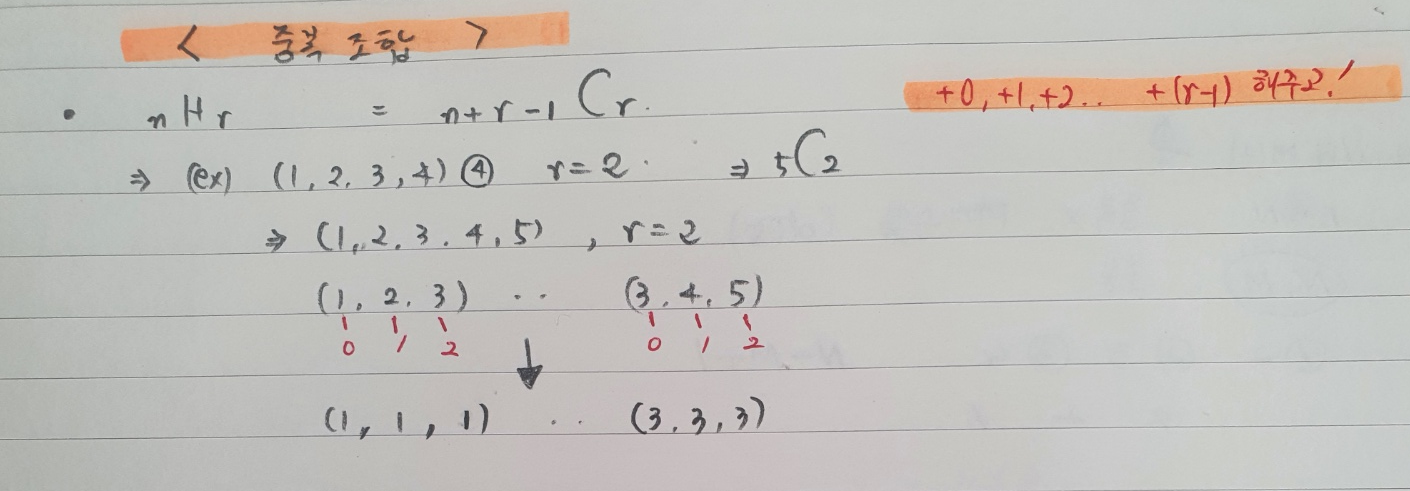

In [85]:
def dfs_H(array,N):
    M = len(array)
    idx = [_ for _ in range(M+N-1)] # N = 2
    print(M+N-1)
    visited=[]
    next_visit=[[_] for _ in range(M+N-1-N+1)]
    while next_visit:
        next = next_visit.pop()
        if len(next)==N:
            result=[]
            for _,j in enumerate(next):
                result.append(array[j-_])
            visited.append(result)
        else:
            for i in range(next[-1]+1,M+N-1): # 조합, 중복 허용 X
                if i not in next: # 중복 허용 X
                    next_visit.append(next+[i])
    return visited

In [87]:
sorted(dfs_H([1,2,3,4],3))

6


[[1, 1, 1],
 [1, 1, 2],
 [1, 1, 3],
 [1, 1, 4],
 [1, 2, 2],
 [1, 2, 3],
 [1, 2, 4],
 [1, 3, 3],
 [1, 3, 4],
 [1, 4, 4],
 [2, 2, 2],
 [2, 2, 3],
 [2, 2, 4],
 [2, 3, 3],
 [2, 3, 4],
 [2, 4, 4],
 [3, 3, 3],
 [3, 3, 4],
 [3, 4, 4],
 [4, 4, 4]]

# 날짜 계산  
https://www.acmicpc.net/problem/1476 <- 전체로 접근해버림

In [ ]:
E,S,M = map(int,input().split())

In [ ]:
15, 28, 19

## 유클리드 호제법

In [103]:
def gcd(a,b):
    # a = bq+r
    # a and b
    # b and r
    # m>n
    if a%b==0:
        return b
    else:
        return gcd(b,a%b)

In [110]:
def solution(E,S,M):
    if E==S and S==M:
        return E
    else:
        return set(Result[0][E]).intersection(set(Result[1][S]),set(Result[2][M])).pop()

In [128]:
Result=[]
for j in [15,28,19]:
    t=0
    e={_:[] for _ in range(1,j+1)}
    while True:
        for _ in range(1,j+1):
            e[_].append(_+j*t)
        t+=1
        if t == 15*28*19//j:
            break
    Result.append(e)

In [114]:
solution(1,2,3)

7980